In [247]:
#IMPORTAÇÃO DE BIBLIOTECAS
#!pip install -q glove_python
import numpy as np
import pandas as pd
import nltk
from nltk.tokenize import sent_tokenize,word_tokenize
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
import string
import joblib


nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('universal_tagset')
nltk.download('wordnet')
lemmatizer = nltk.WordNetLemmatizer()

from bs4 import BeautifulSoup  
import re
import nltk
from nltk.corpus import stopwords 
from nltk.stem.porter import PorterStemmer
from nltk.stem import SnowballStemmer, WordNetLemmatizer
from nltk import sent_tokenize, word_tokenize, pos_tag

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

from sklearn.svm import SVC

[nltk_data] Downloading package stopwords to C:\Users\Marcelo
[nltk_data]     Rocha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Marcelo
[nltk_data]     Rocha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Marcelo Rocha\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to C:\Users\Marcelo
[nltk_data]     Rocha\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to C:\Users\Marcelo
[nltk_data]     Rocha\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package universal_tagset to C:\Users\Marcelo
[nltk_data]     Rocha\AppData\Roaming\

In [249]:
#IMPORTAÇÃO DE BIBLIOTECAS

from itertools import *
from sklearn.feature_extraction.text import CountVectorizer
from nltk import word_tokenize          
from nltk.stem import WordNetLemmatizer 

from nltk.corpus import wordnet

from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
 
import seaborn as sns
sns.set_style("darkgrid")

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from scipy.sparse import csr_matrix
import numpy as np
import seaborn as sns


from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, make_scorer
from sklearn.metrics import f1_score


from sklearn.neighbors import KNeighborsClassifier

from sklearn import svm
from sklearn.model_selection import cross_val_score

from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

from wordcloud import WordCloud
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from imblearn.under_sampling import ClusterCentroids
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report
# from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix
from imblearn.under_sampling import NearMiss, RandomUnderSampler

from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import (
    Dense, Dropout, Activation, Lambda,
    Embedding, Conv1D,
    LSTM, SimpleRNN, GRU
)
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras import backend as K
from tensorflow.keras.models import Sequential


import logging
from gensim.models import word2vec
from gensim.models import Word2Vec
from gensim.models.keyedvectors import KeyedVectors
#importing the glove library
#from glove import Corpus, Glove

In [251]:

# 4. Carrega o JSON no DataFrame
df = pd.read_excel('cleaned_reviews.xlsx')

# 5. Visualiza as primeiras linhas
df.head()

,sentiments,cleaned_review,cleaned_review_length,review_score
0,positive,i wish would have gotten one earlier love it a...,19,5
1,neutral,i ve learned this lesson again open the packag...,88,1
2,neutral,it is so slow and lags find better option,9,2
3,neutral,roller ball stopped working within months of m...,12,1
4,neutral,i like the color and size but it few days out ...,21,1


In [253]:
df['sentiments'].value_counts()

sentiments
positive    9507
neutral     6307
negative    1538
Name: count, dtype: int64

In [255]:
df.isnull().sum()

sentiments               0
cleaned_review           3
cleaned_review_length    0
review_score             0
dtype: int64

In [257]:
df = df.dropna(subset=['cleaned_review'])
df.isnull().sum()

sentiments               0
cleaned_review           0
cleaned_review_length    0
review_score             0
dtype: int64

In [259]:
def map_sentiment(sentiment):
    if sentiment == "negative":
        return 0   # Negativo
    elif sentiment == "neutral":
        return 1   # Neutro
    else:
        return 2   # Positivo


df['sentiments_final'] = df['sentiments'].apply(map_sentiment)

In [263]:
df['sentiments_final'].value_counts()

sentiments_final
2    9507
1    6304
0    1538
Name: count, dtype: int64

In [267]:
# Descobrir tamanho da menor classe
min_class_size = df['sentiments_final'].value_counts().min()

# Fazer undersampling em cada classe
df_balanced = (
    df.groupby('sentiments_final', group_keys=False)
      .apply(lambda x: x.sample(n=min_class_size, random_state=42))
)

# Embaralhar o dataset final
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# Verificar
df_balanced['sentiments_final'].value_counts()


C:\Users\Marcelo Rocha\AppData\Local\Temp\ipykernel_13384\3466893856.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(n=min_class_size, random_state=42))


sentiments_final
1    1538
0    1538
2    1538
Name: count, dtype: int64

In [269]:
print("Tamanho do Dataset",df_balanced.shape)

Tamanho do Dataset (4614, 5)


Distribuição de sentimentos


array([[<Axes: title={'center': 'sentiments_final'}>]], dtype=object)

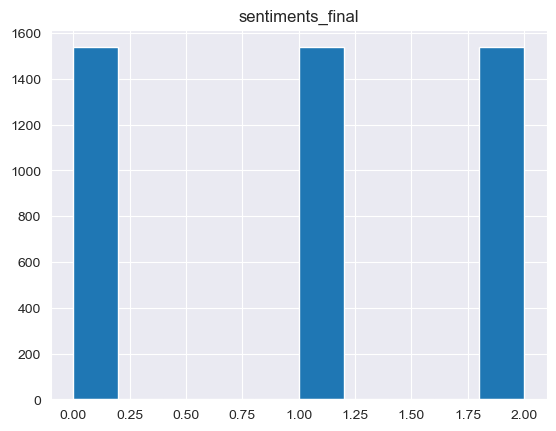

In [271]:
print('Distribuição de sentimentos')
df_balanced.hist('sentiments_final')

In [273]:
X = df_balanced['cleaned_review']
y = df_balanced['sentiments_final']

In [275]:
# Config globais (evita recarregar na função)
STOP_WORDS = set(stopwords.words('english'))
# Preservar mais negações para melhor análise de sentimentos
NEGATIONS = ['not', 'no', 'never', 'neither', 'nor', 'cannot', "can't", 'nothing', 'none', 'nowhere', 'nobody']
for word in NEGATIONS:
    STOP_WORDS.discard(word)

LEMMATIZER = WordNetLemmatizer()
STEMMER = SnowballStemmer('english')


def clean_review(text: str, 
                 remove_stopwords: bool = True,
                 lemmatize: bool = True,
                 stem: bool = False,  # Opcional, para comparação com o original
                 remove_numbers: bool = False,
                 return_tokens: bool = False) -> str | list[str]:
    """
    Função de limpeza otimizada para reviews da Amazon. 
    Compatível com TF-IDF/Word2Vec e modelos como MNB, LR, SVM, KNN, AdaBoost.
    
    Parâmetros:
    - text: texto bruto
    - remove_stopwords: remover stopwords (preservando negações)
    - lemmatize: aplicar lematização (recomendado)
    - stem: aplicar stemming (alternativa, mas menos precisa)
    - remove_numbers: remover números (ex: preços)
    - return_tokens: devolver lista de tokens (para Word2Vec) ou string (para TF-IDF)
    
    Retorna: string limpa ou lista de tokens
    """
    if pd.isna(text) or not isinstance(text, str):
        return "" if not return_tokens else []
    
    # 1. Remover HTML
    text = BeautifulSoup(text, "lxml").get_text()
    
    # 2. Minúsculas
    text = text.lower()
    
    # 3. Remover indesejados
    pattern = r'[^a-z\s]' if remove_numbers else r'[^a-z0-9\s]'
    text = re.sub(pattern, ' ', text)
    
    # 4. Tokenização precisa
    tokens = word_tokenize(text)
    
    # 5. Remover stopwords
    if remove_stopwords:
        tokens = [t for t in tokens if t not in STOP_WORDS and len(t) > 1]  # Ignora tokens muito curtos
    
    # 6. Lematização ou stemming
    if lemmatize:
        tokens = [LEMMATIZER.lemmatize(t) for t in tokens]
    elif stem:
        tokens = [STEMMER.stem(t) for t in tokens]
    
    # 7. Retornar
    if return_tokens:
        return tokens
    return ' '.join(tokens)

In [277]:
X_cleaned = []
X_cleaned = [clean_review(text, remove_stopwords=False, lemmatize=True, remove_numbers=True) 
                     for text in X]

In [279]:
len(X_cleaned)

4614

In [281]:
#Classificação de texto usando Bag of Words com CountVectorizer
countVect = CountVectorizer(
    min_df=5,
    max_df=0.90,
    max_features=8000,
    ngram_range=(1,2),
    strip_accents='unicode',
    binary=False
)


X_all_countVect = countVect.fit_transform(X_cleaned)

feature_names = countVect.get_feature_names_out()

print("Number of features : %d\n" % len(feature_names))
print("Show some feature names:\n", feature_names[::1000])

Number of features : 6570

Show some feature names:
 ['ability' 'cheap but' 'good headset' 'light work' 'out but' 'surface and'
 'volume is']


In [317]:
#Classificação de texto usando TF-IDF com TfidfVectorizer
tfidf = TfidfVectorizer(
    min_df=5,
    max_df=0.85,
    max_features=12000,      # 🔥 mais adequado para 4600 docs
    ngram_range=(1,2),
    strip_accents='unicode',
    norm='l2',
    use_idf=True,
    smooth_idf=True,
    sublinear_tf=True
)

X_all_tfidf = tfidf.fit_transform(X_cleaned)

print(f"Vocabulário TF-IDF: {X_all_tfidf.shape[1]:,} termos")
print("Exemplos de features:\n", tfidf.get_feature_names_out()[::1500][:20])

Vocabulário TF-IDF: 6,570 termos
Exemplos de features:
 ['ability' 'email' 'light work' 'rid' 'volume is']


In [351]:
#WORD EMBEDDING
# Vamos assumir que X_cleaned já é a lista de strings limpas
X_tokens = [word_tokenize(text) for text in X_cleaned]

#print(X_tokens[0][:10])  # exemplo de tokens do primeiro review

# Caminho para o arquivo .txt do GloVe
glove_file = 'glove.6B/glove.6B.100d.txt'

# Carregar embeddings
embeddings_index = {}
with open(glove_file, 'r', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = vector

print(f"Número de palavras no GloVe: {len(embeddings_index)}")
#-----------------------------------------------------------------------------
embedding_dim = 100  # depende do GloVe que você baixou

def review_to_vec(tokens, embeddings_index, embedding_dim):
    vecs = []
    for t in tokens:
        if t in embeddings_index:
            vecs.append(embeddings_index[t])
    if len(vecs) > 0:
        return np.mean(vecs, axis=0)  # média das palavras
    else:
        return np.zeros(embedding_dim)

# Transformar todas as reviews
X_embeddings = np.array([review_to_vec(tokens, embeddings_index, embedding_dim) for tokens in X_tokens])

print(X_embeddings.shape)  # deve dar (4602, 100)


Número de palavras no GloVe: 400000
(4614, 100)


In [359]:

# X_all_countVect já é a matriz de features (CountVectorizer)
# y é a coluna 'sentiment'

# Dividir em treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(
    X_embeddings,
    y,
    test_size=0.2,         # 20% para teste
    random_state=42,       # para reprodutibilidade
    stratify=y             # mantém proporção de classes
)

target_names = ['Negative', 'Neutral' , 'Positive']

# Verificar distribuição das classes
print("Distribuição no treino:")
print(y_train.value_counts())
print("\nDistribuição no teste:")
print(y_test.value_counts())

print(X_train.shape, X_test.shape)


Distribuição no treino:
sentiments_final
0    1231
2    1230
1    1230
Name: count, dtype: int64

Distribuição no teste:
sentiments_final
2    308
1    308
0    307
Name: count, dtype: int64
(3691, 100) (923, 100)


In [361]:
def knn_classifier(X_train_countVect,y_train,X_test_countVect,y_test,target_names, save_path=None): 
    
    classifier=KNeighborsClassifier(n_neighbors=5)
    classifier.fit(X_train_countVect,y_train)

    y_pred=classifier.predict(X_test_countVect)

    y_pred_train = classifier.predict(X_train_countVect)
    print('KNN Results:')
    print("KNN Accuracy:",metrics.accuracy_score(y_test,y_pred))
    print(classification_report(y_test, y_pred, target_names=target_names))
    print("Confusion Matrix",confusion_matrix(y_test, y_pred))    
    print("KNN Train Accuracy:",metrics.accuracy_score(y_train,y_pred_train))
    #print(classification_report(y_train, y_pred_train, target_names=target))

     # Salvar modelo se o caminho for passado
      # 💾 Guardar modelo
    if save_path is not None:
        joblib.dump(classifier, save_path)
        print(f"Modelo KNN guardado em: {save_path}")


    return metrics.accuracy_score(y_test,y_pred), f1_score(y_test, y_pred, average='weighted')

In [363]:
# Chamar a função e receber Accuracy e F1 score
knn_acc, knn_f1 = knn_classifier(X_train, y_train, X_test, y_test, target_names, save_path="../Exame/modelos/modelo_knn.joblib")

# Imprimir resultados
print("Resultados do KNN:")
print("Accuracy:", knn_acc)
print("F1 Score (weighted):", knn_f1)

KNN Results:
KNN Accuracy: 0.5937161430119177
              precision    recall  f1-score   support

    Negative       0.52      0.78      0.62       307
     Neutral       0.70      0.28      0.40       308
    Positive       0.65      0.72      0.69       308

    accuracy                           0.59       923
   macro avg       0.62      0.59      0.57       923
weighted avg       0.62      0.59      0.57       923

Confusion Matrix [[239  21  47]
 [150  87  71]
 [ 69  17 222]]
KNN Train Accuracy: 0.7122730967217556
Modelo KNN guardado em: ../Exame/modelos/modelo_knn.joblib
Resultados do KNN:
Accuracy: 0.5937161430119177
F1 Score (weighted): 0.570564384351167


In [365]:
def nb_classifier(X_train_countVect, y_train, X_test_countVect, y_test, target_names, save_path=None): 
    # Criar e treinar o classificador
    clf = MultinomialNB()
    clf.fit(X_train_countVect, y_train)  # .toarray() para MultinomialNB

    # Predição
    y_pred = clf.predict(X_test_countVect)
    y_pred_train = clf.predict(X_train_countVect)

    # Resultados
    print('Naive Bayes Results:')
    print("MNB Test Accuracy:", metrics.accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred, target_names=target_names))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))    
    print("MNB Train Accuracy:", metrics.accuracy_score(y_train, y_pred_train))
    #print(classification_report(y_train, y_pred_train, target_names=target_names))

       # 💾 Guardar modelo
    if save_path is not None:
        joblib.dump(clf, save_path)
        print(f"Modelo Naive de Bayes guardado em: {save_path}")

    # Retornar Accuracy e F1-score
    return metrics.accuracy_score(y_test, y_pred), f1_score(y_test, y_pred, average='weighted')

In [367]:
nb_acc, nb_f1 = nb_classifier(X_train, y_train, X_test, y_test, target_names, save_path="../Exame/modelos/modelo_naive_bayes.joblib")

print("\nResultados do Naive Bayes:")
print("Accuracy:", nb_acc)
print("F1 Score (weighted):", nb_f1)

ValueError: Negative values in data passed to MultinomialNB (input X)

In [373]:
# Logistic Regression
def lr_classifier(X_train_countVect,y_train,X_test_countVect,y_test,target_names, save_path=None): 
  lr = LogisticRegression(class_weight='balanced', max_iter=1000)
  lr.fit(X_train_countVect, y_train)


  y_pred=lr.predict(X_test_countVect)

  y_pred_train =lr.predict(X_train_countVect)
  print('LR Results:')
  #   y_pred_train =clf.predict(countVect.transform(X_test_cleaned))
  print("LR Accuracy:",metrics.accuracy_score(y_test,y_pred))
  print(classification_report(y_test, y_pred, target_names=target_names))
  print("Confusion Matrix",confusion_matrix(y_test, y_pred))    
  print("LR Train Accuracy:",metrics.accuracy_score(y_train,y_pred_train))
  #print(classification_report(y_train, y_pred_train, target_names=target_names))

    # 💾 Guardar modelo
  if save_path is not None:
    joblib.dump(lr, save_path)
    print(f"Modelo Logistic Regression guardado em: {save_path}")
  
  return metrics.accuracy_score(y_test,y_pred), f1_score(y_test, y_pred, average='weighted')

In [375]:
lr_acc, lr_f1 = lr_classifier(X_train, y_train, X_test, y_test, target_names, save_path="../Exame/modelos/modelo_logistic_regression.joblib")

print("\nResultados do Logistic Regression:")
print("Accuracy:", lr_acc)
print("F1 Score (weighted):", lr_f1)

LR Results:
LR Accuracy: 0.6403033586132177
              precision    recall  f1-score   support

    Negative       0.61      0.73      0.67       307
     Neutral       0.54      0.47      0.50       308
    Positive       0.77      0.72      0.74       308

    accuracy                           0.64       923
   macro avg       0.64      0.64      0.64       923
weighted avg       0.64      0.64      0.64       923

Confusion Matrix [[225  67  15]
 [111 145  52]
 [ 31  56 221]]
LR Train Accuracy: 0.6648604714169601
Modelo Logistic Regression guardado em: ../Exame/modelos/modelo_logistic_regression.joblib

Resultados do Logistic Regression:
Accuracy: 0.6403033586132177
F1 Score (weighted): 0.6375469970059483


In [377]:
# #   Decision Trees
def dt_classifier(X_train_countVect,y_train,X_test_countVect,y_test,target_names, save_path=None): 
  clf = AdaBoostClassifier(n_estimators=400,learning_rate=1,algorithm='SAMME')
  clf.fit(X_train_countVect,y_train)
  
  y_pred=clf.predict(X_test_countVect)
  
  y_pred_train =clf.predict(X_train_countVect)


  print('Adaboosting Results:')
  print("Adaboosting DT Accuracy:",metrics.accuracy_score(y_test,y_pred))
  print(classification_report(y_test, y_pred, target_names=target_names))
  print("Confusion Matrix",confusion_matrix(y_test, y_pred))    
  print("Adaboosting DT Train Accuracy:",metrics.accuracy_score(y_train,y_pred_train))
  #print(classification_report(y_train, y_pred_train, target_names=target_names))

          # 💾 Guardar modelo
  if save_path is not None:
    joblib.dump(clf, save_path)
    print(f"Modelo Decision Trees guardado em: {save_path}")
  
  return metrics.accuracy_score(y_test,y_pred), f1_score(y_test, y_pred, average='weighted')

In [379]:
dt_acc, dt_f1 = dt_classifier(X_train, y_train, X_test, y_test, target_names, save_path="../Exame/modelos/modelo_decision_trees.joblib")

print("\nResultados do Decision Tree:")
print("Accuracy:", dt_acc)
print("F1 Score (weighted):", dt_f1)

Adaboosting Results:
Adaboosting DT Accuracy: 0.6533044420368364
              precision    recall  f1-score   support

    Negative       0.62      0.72      0.67       307
     Neutral       0.59      0.54      0.56       308
    Positive       0.77      0.70      0.73       308

    accuracy                           0.65       923
   macro avg       0.66      0.65      0.65       923
weighted avg       0.66      0.65      0.65       923

Confusion Matrix [[221  68  18]
 [ 93 167  48]
 [ 43  50 215]]
Adaboosting DT Train Accuracy: 0.7141696017339474
Modelo Decision Trees guardado em: ../Exame/modelos/modelo_decision_trees.joblib

Resultados do Decision Tree:
Accuracy: 0.6533044420368364
F1 Score (weighted): 0.6529700495583975


In [381]:
#SVM
def svc_classifier(X_train_countVect,y_train,X_test_countVect,y_test,target_names, save_path=None): 
  from sklearn import svm
  clf=svm.SVC(kernel='linear')
  clf.fit(X_train_countVect,y_train)

  y_pred=clf.predict(X_test_countVect)
  
  y_pred_train =clf.predict(X_train_countVect)

# scores = cross_val_score(clf, iris.data, iris.target, cv=5)
# print("scores",scores.avg)
  print('SVM Results:')
  print("SVM Accuracy:",metrics.accuracy_score(y_test,y_pred))
  print(classification_report(y_test, y_pred, target_names=target_names))
  print("Confusion Matrix",confusion_matrix(y_test, y_pred))    
  print("SVM Train Accuracy:",metrics.accuracy_score(y_train,y_pred_train))
  #print(classification_report(y_train, y_pred_train, target_names=target_names))

            # 💾 Guardar modelo
  if save_path is not None:
    joblib.dump(clf, save_path)
    print(f"Modelo SVM guardado em: {save_path}")

  return metrics.accuracy_score(y_test,y_pred), f1_score(y_test, y_pred, average='weighted')
  

In [383]:
svm_acc, svm_f1 = svc_classifier(X_train, y_train, X_test, y_test, target_names, save_path="../Exame/modelos/modelo_svm.joblib")

print("\nResultados do SVM:")
print("Accuracy:", svm_acc)
print("F1 Score (weighted):", svm_f1)

SVM Results:
SVM Accuracy: 0.638136511375948
              precision    recall  f1-score   support

    Negative       0.60      0.80      0.69       307
     Neutral       0.56      0.42      0.48       308
    Positive       0.76      0.69      0.73       308

    accuracy                           0.64       923
   macro avg       0.64      0.64      0.63       923
weighted avg       0.64      0.64      0.63       923

Confusion Matrix [[247  46  14]
 [127 129  52]
 [ 38  57 213]]
SVM Train Accuracy: 0.6721755621782715
Modelo SVM guardado em: ../Exame/modelos/modelo_svm.joblib

Resultados do SVM:
Accuracy: 0.638136511375948
F1 Score (weighted): 0.6301274344552401


In [385]:
# Random Forest
def rf_classifier(X_train_countVect, y_train, X_test_countVect, y_test, target_names, save_path=None): 
    
    clf = RandomForestClassifier(
        n_estimators=300,        # número de árvores
        max_depth=None,          # deixa crescer (pode testar 30 ou 50)
        min_samples_split=2,
        min_samples_leaf=1,
        random_state=42,
        n_jobs=-1                # usa todos os cores da CPU
    )
    
    clf.fit(X_train_countVect, y_train)
    
    y_pred = clf.predict(X_test_countVect)
    y_pred_train = clf.predict(X_train_countVect)

    print('Random Forest Results:')
    print("RF Accuracy:", metrics.accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred, target_names=target_names))
    print("Confusion Matrix", confusion_matrix(y_test, y_pred))    
    print("RF Train Accuracy:", metrics.accuracy_score(y_train, y_pred_train))

           # 💾 Guardar modelo
    if save_path is not None:
        joblib.dump(clf, save_path)
        print(f"Modelo Random Forest guardado em: {save_path}")
    
    return metrics.accuracy_score(y_test, y_pred), f1_score(y_test, y_pred, average='weighted')


In [387]:
rf_acc, rf_f1 = rf_classifier(X_train, y_train, X_test, y_test, target_names, save_path="../Exame/modelos/modelo_random_forest.joblib")

print("\nResultados do Random Forest:")
print("Accuracy:", rf_acc)
print("F1 Score (weighted):", rf_f1)

Random Forest Results:
RF Accuracy: 0.7248104008667389
              precision    recall  f1-score   support

    Negative       0.70      0.79      0.74       307
     Neutral       0.72      0.64      0.68       308
    Positive       0.76      0.75      0.75       308

    accuracy                           0.72       923
   macro avg       0.73      0.72      0.72       923
weighted avg       0.73      0.72      0.72       923

Confusion Matrix [[242  37  28]
 [ 67 196  45]
 [ 39  38 231]]
RF Train Accuracy: 1.0
Modelo Random Forest guardado em: ../Exame/modelos/modelo_random_forest.joblib

Resultados do Random Forest:
Accuracy: 0.7248104008667389
F1 Score (weighted): 0.723604285478232


In [349]:
#GUARDAR COUNTVECTORIZER , TFIDFVECTORIZER E WORD EMBEDDINGS

#joblib.dump(countVect, "../Exame/modelos/count_vectorizer.joblib" )
#joblib.dump(tfidf, "../Exame/modelos/tf_idf_vectorizer.joblib" )


['../Exame/modelos/tf_idf_vectorizer.joblib']

In [397]:
#TESTAR MODELOS

# carregar
countVect = joblib.load("../Exame/modelos/count_vectorizer.joblib") #carregar o countVectorizer (transforma texto em números)
modelo = joblib.load("../Exame/modelos/bag_of_words/modelo_logistic_regression.joblib") #carregar modelo

# frase nova

frases = [
    "I absolutely loved this product, it works perfectly.",
    "This is one of the best experiences I have ever had.",
    "The service was excellent and the quality exceeded my expectations.",
    "Amazing product, totally worth the money.",
    "Everything was great, I would definitely recommend it.",
]

# frases = [
#     "This product is terrible and completely useless.",
#     "I am very disappointed, it stopped working after one day.",
#     "The quality is poor and the service was awful",
#     "Waste of money, I regret buying this.",
#     "It was a horrible experience and I will not buy this again.",
# ]

# frases = [
#     "The product arrived on time and works as expected.",
#     "It is okay, nothing special but not bad either.",
#     "The service was acceptable and the product matches the description.",
#     "This product does what it is supposed to do..",
#     "The experience was average and met my basic expectations.",
# ]

# preprocessamento
frases_limpas = []
frases_limpas = [clean_review(text, remove_stopwords=False, lemmatize=True, remove_numbers=True) 
                     for text in frases]


# prever
for frase in frases_limpas:
    X = countVect.transform([frase]) # vetorizar (transforma texto em números)
    pred = modelo.predict(X)
    print(f'"{frase}" → {target_names[pred[0]]}')





"i absolutely loved this product it work perfectly" → Positive
"this is one of the best experience i have ever had" → Positive
"the service wa excellent and the quality exceeded my expectation" → Positive
"amazing product totally worth the money" → Positive
"everything wa great i would definitely recommend it" → Positive
